<a href="https://colab.research.google.com/github/al2501/fooddesert/blob/main/Diet_and_Lifestyle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing files

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving CorrectedFastFoodData (2) (2).csv to CorrectedFastFoodData (2) (2).csv


In [ ]:
from google.colab import files
uploaded=files.upload()

Saving uklocalauthority2019april.geojson to uklocalauthority2019april.geojson


# Installing & importing

In [ ]:
!pip install geopandas
import pandas as pd
import geopandas as gpd
import folium
import branca.colormap as cm

     |████████████████████████████████| 1.0 MB 9.8 MB/s 
     |████████████████████████████████| 15.4 MB 47.8 MB/s 
     |████████████████████████████████| 6.3 MB 47.3 MB/s 


# 1. Obesity and the Environment

In [ ]:
fname = '/content/uklocalauthority2019april.geojson'
nil = gpd.read_file(fname)
nil.head()

,OBJECTID,LAD19CD,LAD19NM,LAD19NMW,BNG_E,BNG_N,LONG,LAT,Shape__Area,Shape__Length,geometry
0,1,E06000001,Hartlepool,,447157,531476,-1.27023,54.6762,9.651231e+07,50488.387081,"POLYGON ((-1.17763 54.69919, -1.17398 54.69182..."
1,2,E06000002,Middlesbrough,,451141,516887,-1.21099,54.5447,5.522915e+07,35506.404054,"POLYGON ((-1.28263 54.56528, -1.26256 54.57029..."
2,3,E06000003,Redcar and Cleveland,,464359,519597,-1.00611,54.5675,2.484090e+08,79150.715938,"POLYGON ((-1.14913 54.61433, -1.15462 54.62750..."
3,4,E06000004,Stockton-on-Tees,,444937,518183,-1.30669,54.5569,2.052315e+08,87566.678920,"POLYGON ((-1.28263 54.56528, -1.27061 54.55602..."
4,5,E06000005,Darlington,,428029,515648,-1.56835,54.5353,1.988128e+08,91926.839545,"POLYGON ((-1.69693 54.53601, -1.70527 54.54917..."


In [ ]:
nil=nil[['LAD19CD','geometry']]
nil=nil.rename(columns={"LAD19CD": "ID_NIL"})
nil.head()

,ID_NIL,geometry
0,E06000001,"POLYGON ((-1.17763 54.69919, -1.17398 54.69182..."
1,E06000002,"POLYGON ((-1.28263 54.56528, -1.26256 54.57029..."
2,E06000003,"POLYGON ((-1.14913 54.61433, -1.15462 54.62750..."
3,E06000004,"POLYGON ((-1.28263 54.56528, -1.27061 54.55602..."
4,E06000005,"POLYGON ((-1.69693 54.53601, -1.70527 54.54917..."


In [ ]:
obesity= pd.read_csv('/content/CorrectedFastFoodData (2) (2).csv')
obesity.head(1)

,PHE Centre,LA Code,LA name,Count of outlets,"Rate per 100,000 population"
0,South East,E07000223,Adur,58.0,91.2


In [ ]:
obesity=obesity[['LA Code','LA name','Rate per 100,000 population']]
obesity=obesity.rename(columns={"LA Code": "ID_NIL"})
obesity.head(5)

,ID_NIL,LA name,"Rate per 100,000 population"
0,E07000223,Adur,91.2
1,E07000026,Allerdale,100.9
2,E07000032,Amber Valley,90.5
3,E07000224,Arun,85.8
4,E07000170,Ashfield,99.6


In [ ]:
merged=nil.merge(obesity,on="ID_NIL")
merged.head()

,ID_NIL,geometry,LA name,"Rate per 100,000 population"
0,E06000001,"POLYGON ((-1.17763 54.69919, -1.17398 54.69182...",Hartlepool,160.5
1,E06000002,"POLYGON ((-1.28263 54.56528, -1.26256 54.57029...",Middlesbrough,131.1
2,E06000003,"POLYGON ((-1.14913 54.61433, -1.15462 54.62750...",Redcar and Cleveland,118.1
3,E06000004,"POLYGON ((-1.28263 54.56528, -1.27061 54.55602...",Stockton-on-Tees,102.1
4,E06000005,"POLYGON ((-1.69693 54.53601, -1.70527 54.54917...",Darlington,148.6


In [ ]:
x_map=nil.centroid.x.mean()
y_map=nil.centroid.y.mean()+0.3
print(x_map,y_map)

-1.635780340083093 53.004307290266524


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


In [ ]:
mymap = folium.Map(location=[y_map, x_map], zoom_start=7,tiles=None)
folium.TileLayer('CartoDB positron',name="Light Map",control=False).add_to(mymap)
mymap

In [ ]:
folium.Choropleth(
 geo_data=merged,
 name='Choropleth',
 data=merged,
 columns=['ID_NIL','Rate per 100,000 population'],
 key_on="feature.properties.ID_NIL",
 fill_color='YlGnBu',
 fill_opacity=1,
 line_opacity=0.2,
 legend_name="Rate of outlets per 100,000 population",
 smooth_factor=0
).add_to(mymap)
mymap.save('/content/fastfoodoutlet_1.html')

In [ ]:
colormap1 = cm.linear.YlGnBu_09.to_step(data=merged['Rate per 100,000 population'], method='quant', quantiles=[0,0.2,0.4,0.6,0.8,1])
colormap2=cm.linear.YlGnBu_09.to_step(data=merged['Rate per 100,000 population'], method='quant', quantiles=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

In [ ]:
mymap2 = folium.Map(location=[y_map, x_map], zoom_start=6,tiles=None)
folium.TileLayer('CartoDB positron',name="Light Map",control=False).add_to(mymap2)
colormap1.caption = "Rate of outlets per 100,000 population"
style_function = lambda x: {"weight":0.5, 
                            'color':'black',
                            'fillColor':colormap1(x['properties']['Rate per 100,000 population']), 
                            'fillOpacity':0.75}
highlight_function = lambda x: {'fillColor': '#000000', 
                                'color':'#000000', 
                                'fillOpacity': 0.50, 
                                'weight': 0.1}
NIL=folium.features.GeoJson(
        merged,
        style_function=style_function,
        control=False,
        highlight_function=highlight_function,
        tooltip=folium.features.GeoJsonTooltip(fields=['LA name','Rate per 100,000 population'],
            aliases=['Neighborhood','Rate of outlets per 100,000 population'],
            style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;"),
            sticky=True
        )
    )
colormap1.add_to(mymap2)
mymap2.add_child(NIL)
mymap2
mymap2.save('/content/fastfoodoutlet_5q.html')

In [ ]:
mymap2 = folium.Map(location=[y_map, x_map], zoom_start=6,tiles=None)
folium.TileLayer('CartoDB positron',name="Light Map",control=False).add_to(mymap2)
colormap2.caption = "Rate of outlets per 100,000 population"
style_function = lambda x: {"weight":0.5, 
                            'color':'black',
                            'fillColor':colormap2(x['properties']['Rate per 100,000 population']), 
                            'fillOpacity':0.75}
highlight_function = lambda x: {'fillColor': '#000000', 
                                'color':'#000000', 
                                'fillOpacity': 0.50, 
                                'weight': 0.1}
NIL=folium.features.GeoJson(
        merged,
        style_function=style_function,
        control=False,
        highlight_function=highlight_function,
        tooltip=folium.features.GeoJsonTooltip(fields=['LA name','Rate per 100,000 population'],
            aliases=['Neighborhood','Rate of outlets per 100,000 population'],
            style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;"),
            sticky=True
        )
    )
colormap2.add_to(mymap2)
mymap2.add_child(NIL)
mymap2.save('/content/fastfoodoutlet_10q.html')

# 2. Proportion of the population meeting the recommended '5-a-day' on a 'usual day' (adults)

In [ ]:
!pip install numpy
import numpy as np
data2=pd.read_csv('/content/5-a-day.csv',dtype={"Area Code": str})

with open ('/content/uklocalauthority2019april.geojson') as response:
  countries=json.load(response)

#countries['features']=[countries['features'][i] for i in range(len(countries['features'])) if (countries['features'][i]['properties']['LAD19CD'] in list(data2['Area Code']))]

print(countries['features'])

data3=[]
for i in range(len(countries['features'])):
  data3.append(countries['features'][i]['properties']['LAD19CD'])
data3=pd.DataFrame(data3)
data3.rename(columns={0:'Area Code'},inplace=True)

data4=data2.merge(data3,how='right',right_on='Area Code',left_on='Area Code')

data4

In [ ]:
import plotly.express as px


fig = px.choropleth(data4, geojson=countries, locations='Area Code', featureidkey='properties.LAD19CD', color='Value',
                           color_continuous_scale="YLGn",
                           range_color=(41, 68),
                           labels={'Value':'percentage'}, scope='europe', hover_name='Area Name'

                          )

fig.update_geos(fitbounds="locations",visible=False)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0}
                )
fig.show()

# folium

In [ ]:
!pip install geopandas
import pandas as pd
import geopandas as gpd
import folium
import branca.colormap as cm

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving 5-a-day.csv to 5-a-day.csv


In [ ]:
from google.colab import files
uploaded=files.upload()

Saving uklocalauthority2019april.geojson to uklocalauthority2019april (1).geojson


In [ ]:
fname = '/content/uklocalauthority2019april.geojson'
nil = gpd.read_file(fname)
nil.head()

,OBJECTID,LAD19CD,LAD19NM,LAD19NMW,BNG_E,BNG_N,LONG,LAT,Shape__Area,Shape__Length,geometry
0,1,E06000001,Hartlepool,,447157,531476,-1.27023,54.6762,9.651231e+07,50488.387081,"POLYGON ((-1.17763 54.69919, -1.17398 54.69182..."
1,2,E06000002,Middlesbrough,,451141,516887,-1.21099,54.5447,5.522915e+07,35506.404054,"POLYGON ((-1.28263 54.56528, -1.26256 54.57029..."
2,3,E06000003,Redcar and Cleveland,,464359,519597,-1.00611,54.5675,2.484090e+08,79150.715938,"POLYGON ((-1.14913 54.61433, -1.15462 54.62750..."
3,4,E06000004,Stockton-on-Tees,,444937,518183,-1.30669,54.5569,2.052315e+08,87566.678920,"POLYGON ((-1.28263 54.56528, -1.27061 54.55602..."
4,5,E06000005,Darlington,,428029,515648,-1.56835,54.5353,1.988128e+08,91926.839545,"POLYGON ((-1.69693 54.53601, -1.70527 54.54917..."


In [ ]:
nil=nil[['LAD19CD','geometry']]
nil=nil.rename(columns={"LAD19CD": "ID_NIL"})
nil.head()

,ID_NIL,geometry
0,E06000001,"POLYGON ((-1.17763 54.69919, -1.17398 54.69182..."
1,E06000002,"POLYGON ((-1.28263 54.56528, -1.26256 54.57029..."
2,E06000003,"POLYGON ((-1.14913 54.61433, -1.15462 54.62750..."
3,E06000004,"POLYGON ((-1.28263 54.56528, -1.27061 54.55602..."
4,E06000005,"POLYGON ((-1.69693 54.53601, -1.70527 54.54917..."


In [ ]:
fiveday= pd.read_csv('/content/5-a-day.csv')
fiveday.head(1)

,Indicator ID,Indicator Name,Parent Code,Parent Name,Area Code,Area Name,Area Type,Sex,Age,Category Type,Category,Time period,Value,Lower CI 95.0 limit,Upper CI 95.0 limit,Lower CI 99.8 limit,Upper CI 99.8 limit,Count,Denominator,Value note,Recent Trend,Compared to England value or percentiles,Compared to percentiles,Time period Sortable,New data,Compared to goal
0,93077,Proportion of the population meeting the recom...,E92000001,England,E06000001,Hartlepool,Districts & UAs (2019/20),Persons,16+ yrs,NaN,NaN,2019/20,49.254923,44.79412,53.691018,NaN,NaN,NaN,481,NaN,Cannot be calculated,Worse,Not compared,20190000,NaN,NaN


In [ ]:
fiveday=fiveday[['Area Code','Area Name','Value']]
fiveday=fiveday.rename(columns={"Area Code": "ID_NIL"})
fiveday.head(5)

,ID_NIL,Area Name,Value
0,E06000001,Hartlepool,49.254923
1,E06000002,Middlesbrough,47.536469
2,E06000003,Redcar and Cleveland,44.094975
3,E06000004,Stockton-on-Tees,54.663153
4,E06000005,Darlington,50.733688


In [ ]:
merged=nil.merge(fiveday,on="ID_NIL")
merged.head()

,ID_NIL,geometry,Area Name,Value
0,E06000001,"POLYGON ((-1.17763 54.69919, -1.17398 54.69182...",Hartlepool,49.254923
1,E06000002,"POLYGON ((-1.28263 54.56528, -1.26256 54.57029...",Middlesbrough,47.536469
2,E06000003,"POLYGON ((-1.14913 54.61433, -1.15462 54.62750...",Redcar and Cleveland,44.094975
3,E06000004,"POLYGON ((-1.28263 54.56528, -1.27061 54.55602...",Stockton-on-Tees,54.663153
4,E06000005,"POLYGON ((-1.69693 54.53601, -1.70527 54.54917...",Darlington,50.733688


In [ ]:
x_map=nil.centroid.x.mean()
y_map=nil.centroid.y.mean()+0.3
print(x_map,y_map)

-1.635780340083093 53.004307290266524


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


In [ ]:
mymap = folium.Map(location=[y_map, x_map], zoom_start=7,tiles=None)
folium.TileLayer('CartoDB positron',name="Light Map",control=False).add_to(mymap)
mymap

In [ ]:
folium.Choropleth(
 geo_data=merged,
 name='Choropleth',
 data=merged,
 columns=['ID_NIL','Value'],
 key_on="feature.properties.ID_NIL",
 fill_color='YlGnBu',
 fill_opacity=1,
 line_opacity=0.2,
 legend_name="Proportion of the population meeting 5-a-day on a usual day (adults)",
 smooth_factor=0
).add_to(mymap)
mymap

In [ ]:
colormap1 = cm.linear.YlGnBu_09.to_step(data=merged['Value'], method='quant', quantiles=[0,0.2,0.4,0.6,0.8,1])
colormap2= cm.linear.YlGnBu_09.to_step(data=merged['Value'], method='quant', quantiles=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

In [ ]:
mymap2 = folium.Map(location=[y_map, x_map], zoom_start=6,tiles=None)
folium.TileLayer('CartoDB positron',name="Light Map",control=False).add_to(mymap2)
colormap1.caption = "Proportion of the population meeting 5-a-day on a usual day (adults)"
style_function = lambda x: {"weight":0.5, 
                            'color':'black',
                            'fillColor':colormap1(x['properties']['Value']), 
                            'fillOpacity':0.75}
highlight_function = lambda x: {'fillColor': '#000000', 
                                'color':'#000000', 
                                'fillOpacity': 0.50, 
                                'weight': 0.1}
NIL=folium.features.GeoJson(
        merged,
        style_function=style_function,
        control=False,
        highlight_function=highlight_function,
        tooltip=folium.features.GeoJsonTooltip(fields=['Area Name','Value'],
            aliases=['Neighborhood','Proportion of population'],
            style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;"),
            sticky=True
        )
    )
colormap1.add_to(mymap2)
mymap2.add_child(NIL)
mymap2.save('/content/5-a-day_5q.html')

In [ ]:
mymap2 = folium.Map(location=[y_map, x_map], zoom_start=6,tiles=None)
folium.TileLayer('CartoDB positron',name="Light Map",control=False).add_to(mymap2)
colormap2.caption = "Proportion of the population meeting 5-a-day on a usual day (adults)"
style_function = lambda x: {"weight":0.5, 
                            'color':'black',
                            'fillColor':colormap2(x['properties']['Value']), 
                            'fillOpacity':0.75}
highlight_function = lambda x: {'fillColor': '#000000', 
                                'color':'#000000', 
                                'fillOpacity': 0.50, 
                                'weight': 0.1}
NIL=folium.features.GeoJson(
        merged,
        style_function=style_function,
        control=False,
        highlight_function=highlight_function,
        tooltip=folium.features.GeoJsonTooltip(fields=['Area Name','Value'],
            aliases=['Neighborhood','Proportion of population'],
            style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;"),
            sticky=True
        )
    )
colormap2.add_to(mymap2)
mymap2.add_child(NIL)
mymap2.save('/content/5-a-day_10q.html')

# Boxplot

In [ ]:
from matplotlib import pyplot as plt

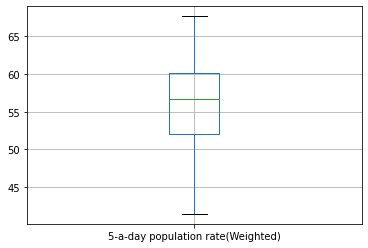

In [ ]:
fiveaday=pd.read_csv('/content/5-a-day.csv')
fiveaday.rename(columns={'Value':'5-a-day population rate(Weighted)'},inplace=True)
box1=fiveaday.boxplot(column=['5-a-day population rate(Weighted)'])
plt.savefig('boxplot1.png')

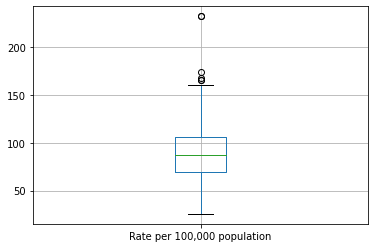

In [ ]:
fastfood=pd.read_csv('/content/CorrectedFastFoodData (2) (1).csv')
fastfood.boxplot(column=['Rate per 100,000 population'])
plt.savefig('boxplot2.png')